In [46]:
#1. Upload dan Baca Dataset

import pandas as pd

# Upload manual (pakai colab file uploader)
from google.colab import files
uploaded = files.upload()

# Baca CSV
df = pd.read_csv("tuberculosis_data_WHO.csv")
df.head()

Saving tuberculosis_data_WHO.csv to tuberculosis_data_WHO (2).csv


,Indicator,PUBLISH STATES,Year,WHO region,World Bank income group,Country,Numeric,Low,High
0,Prevalence of tuberculosis (per 100 000 popula...,Published,2007,Western Pacific,Lower-middle-income,Philippines,576.0,515.0,640.0
1,Deaths due to tuberculosis among HIV-negative ...,Published,2014,Americas,Upper-middle-income,Saint Vincent and the Grenadines,1.0,1.0,1.1
2,Deaths due to tuberculosis among HIV-negative ...,Published,2012,Americas,High-income,Venezuela (Bolivarian Republic of),1.8,1.8,1.8
3,Number of prevalent tuberculosis cases,Published,2014,Europe,High-income,Switzerland,630.0,270.0,1100.0
4,Number of prevalent tuberculosis cases,Published,2011,Africa,Low-income,Mozambique,130000.0,68000.0,210000.0


In [47]:
#2. Cek Struktur & Kolom

# Info umum
df.info()

# Cek nilai unik per kolom
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Cek sample isi kolom indikator dan region
print(df['Indicator'].unique())
print(df['WHO region'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6192 entries, 0 to 6191
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Indicator                6192 non-null   object 
 1   PUBLISH STATES           6192 non-null   object 
 2   Year                     6192 non-null   int64  
 3   WHO region               6192 non-null   object 
 4   World Bank income group  6192 non-null   object 
 5   Country                  6192 non-null   object 
 6   Numeric                  6192 non-null   float64
 7   Low                      6152 non-null   float64
 8   High                     6152 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 435.5+ KB
Indicator: 4 unique values
PUBLISH STATES: 1 unique values
Year: 8 unique values
WHO region: 6 unique values
World Bank income group: 4 unique values
Country: 194 unique values
Numeric: 959 unique values
Low: 791 unique values
High: 109

In [48]:
# Bersihin nama kolom: hapus spasi, ganti titik
df.columns = df.columns.str.strip().str.replace('.', '_').str.replace(' ', '_')

# Cek nama-nama kolom setelah bersih
print(df.columns.tolist())

# ✅ Versi cleaning yang fix
df_cleaned = (
    df
    .drop_duplicates()
    .assign(
        Year=lambda d: pd.to_numeric(d['Year'], errors='coerce'),
        Numeric=lambda d: pd.to_numeric(d['Numeric'], errors='coerce')
    )
    .dropna(subset=['Year', 'Numeric'])  # gunakan 'Numeric' sebagai kolom utama
)

# Cek hasil
print("✅ Data setelah dibersihkan:")
df_cleaned.info()
df_cleaned.head()

['Indicator', 'PUBLISH_STATES', 'Year', 'WHO_region', 'World_Bank_income_group', 'Country', 'Numeric', 'Low', 'High']
✅ Data setelah dibersihkan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6192 entries, 0 to 6191
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Indicator                6192 non-null   object 
 1   PUBLISH_STATES           6192 non-null   object 
 2   Year                     6192 non-null   int64  
 3   WHO_region               6192 non-null   object 
 4   World_Bank_income_group  6192 non-null   object 
 5   Country                  6192 non-null   object 
 6   Numeric                  6192 non-null   float64
 7   Low                      6152 non-null   float64
 8   High                     6152 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 435.5+ KB


,Indicator,PUBLISH_STATES,Year,WHO_region,World_Bank_income_group,Country,Numeric,Low,High
0,Prevalence of tuberculosis (per 100 000 popula...,Published,2007,Western Pacific,Lower-middle-income,Philippines,576.0,515.0,640.0
1,Deaths due to tuberculosis among HIV-negative ...,Published,2014,Americas,Upper-middle-income,Saint Vincent and the Grenadines,1.0,1.0,1.1
2,Deaths due to tuberculosis among HIV-negative ...,Published,2012,Americas,High-income,Venezuela (Bolivarian Republic of),1.8,1.8,1.8
3,Number of prevalent tuberculosis cases,Published,2014,Europe,High-income,Switzerland,630.0,270.0,1100.0
4,Number of prevalent tuberculosis cases,Published,2011,Africa,Low-income,Mozambique,130000.0,68000.0,210000.0


In [49]:
df_cleaned['Indicator'].unique()

array(['Prevalence of tuberculosis (per 100 000 population)',
       'Deaths due to tuberculosis among HIV-negative people (per 100 000 population)',
       'Number of prevalent tuberculosis cases',
       'Number of deaths due to tuberculosis, excluding HIV'],
      dtype=object)

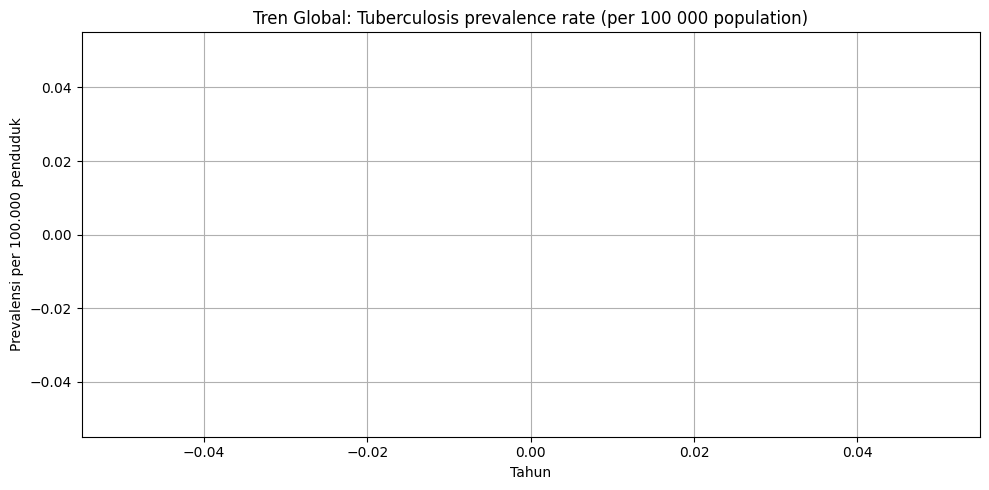

In [50]:
import matplotlib.pyplot as plt

# Filter data hanya untuk indikator tersebut
indikator = 'Tuberculosis prevalence rate (per 100 000 population)'
df_prevalence = df_cleaned[df_cleaned['Indicator'] == indikator]

# Hitung rata-rata global per tahun
global_trend = df_prevalence.groupby('Year')['Numeric'].mean()

# Visualisasi
plt.figure(figsize=(10,5))
global_trend.plot(marker='o')
plt.title(f"Tren Global: {indikator}")
plt.xlabel("Tahun")
plt.ylabel("Prevalensi per 100.000 penduduk")
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
df_cleaned[['Year', 'Indicator', 'Numeric']].sample(10)

,Year,Indicator,Numeric
2914,2014,Deaths due to tuberculosis among HIV-negative ...,2.8
5262,2008,Prevalence of tuberculosis (per 100 000 popula...,32.0
2181,2014,Number of prevalent tuberculosis cases,1200.0
2866,2009,Number of prevalent tuberculosis cases,480.0
3391,2013,"Number of deaths due to tuberculosis, excludin...",650.0
4599,2007,"Number of deaths due to tuberculosis, excludin...",33000.0
195,2009,Prevalence of tuberculosis (per 100 000 popula...,18.0
945,2011,Deaths due to tuberculosis among HIV-negative ...,79.0
3242,2010,Number of prevalent tuberculosis cases,6800.0
2405,2008,"Number of deaths due to tuberculosis, excludin...",1100.0


In [52]:
print("Min:", df_cleaned['Numeric'].min())
print("Max:", df_cleaned['Numeric'].max())

Min: 0.0
Max: 3900000.0


In [53]:
df_cleaned[df_cleaned['Indicator'] == indikator][['Year', 'Country', 'Numeric']].head(20)

,Year,Country,Numeric


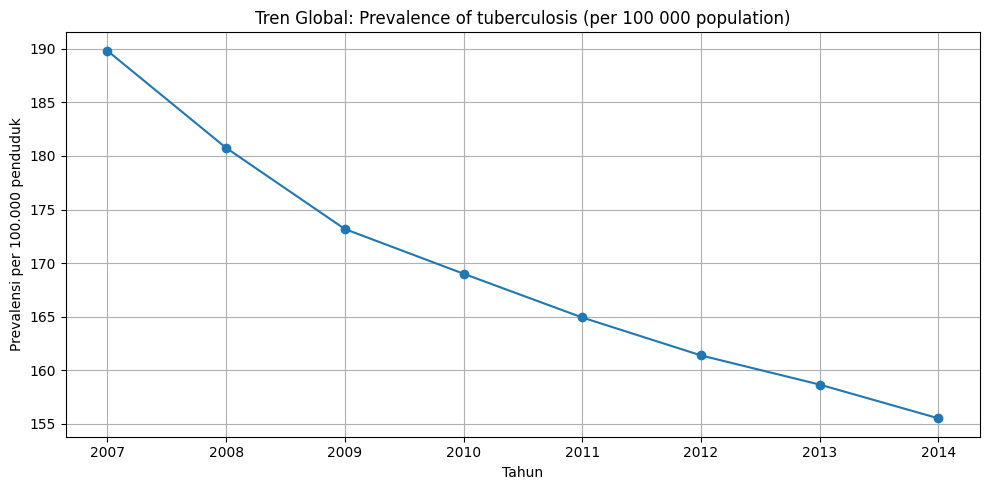

In [54]:
import matplotlib.pyplot as plt

# Pilih indikator yang cocok
indikator = 'Prevalence of tuberculosis (per 100 000 population)'

# Filter berdasarkan indikator
df_prevalence = df_cleaned[df_cleaned['Indicator'] == indikator]

# Group rata-rata per tahun
global_trend = df_prevalence.groupby('Year')['Numeric'].mean()

# Visualisasi
plt.figure(figsize=(10,5))
global_trend.plot(marker='o')
plt.title(f"Tren Global: {indikator}")
plt.xlabel("Tahun")
plt.ylabel("Prevalensi per 100.000 penduduk")
plt.grid(True)
plt.tight_layout()
plt.show()

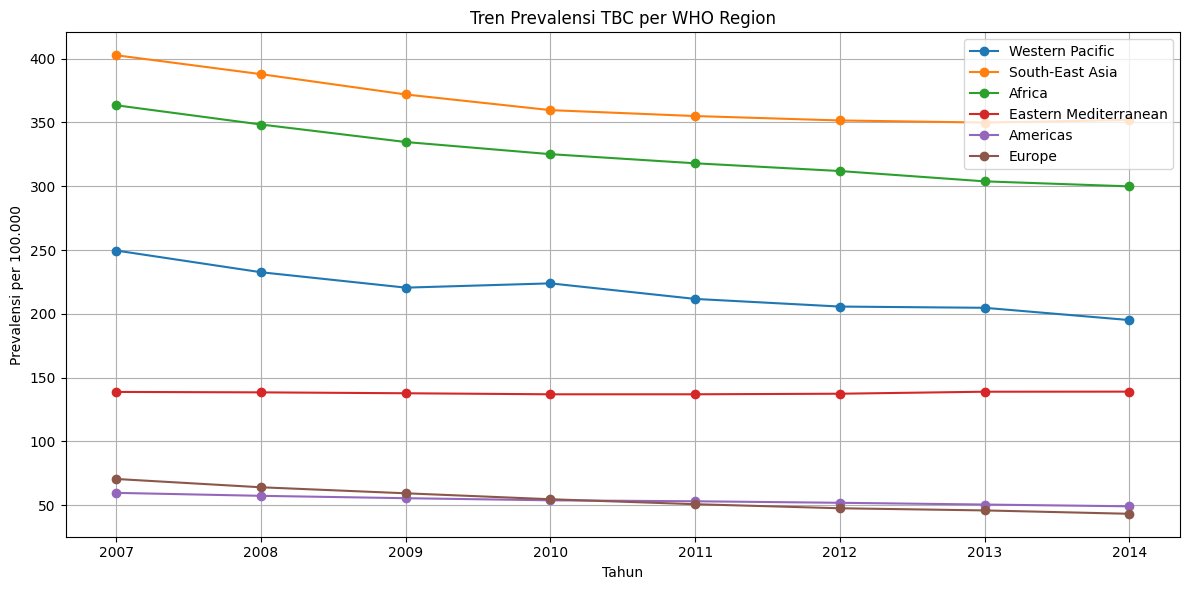

In [55]:
# WHO Region – Tren Prevalensi per Wilayah

plt.figure(figsize=(12,6))
for region in df_prevalence['WHO_region'].unique():
    subset = df_prevalence[df_prevalence['WHO_region'] == region]
    trend = subset.groupby('Year')['Numeric'].mean()
    plt.plot(trend, marker='o', label=region)

plt.title("Tren Prevalensi TBC per WHO Region")
plt.xlabel("Tahun")
plt.ylabel("Prevalensi per 100.000")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

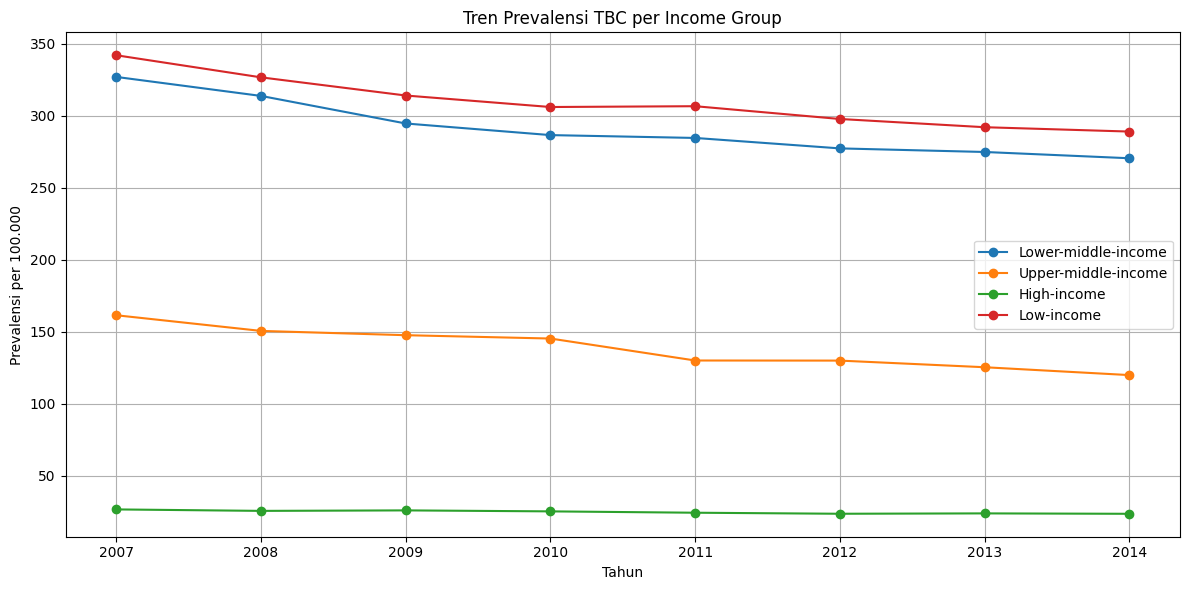

In [56]:
# Income Group – Tren Prevalensi per Kelompok Pendapatan

plt.figure(figsize=(12,6))
for income in df_prevalence['World_Bank_income_group'].dropna().unique():
    subset = df_prevalence[df_prevalence['World_Bank_income_group'] == income]
    trend = subset.groupby('Year')['Numeric'].mean()
    plt.plot(trend, marker='o', label=income)

plt.title("Tren Prevalensi TBC per Income Group")
plt.xlabel("Tahun")
plt.ylabel("Prevalensi per 100.000")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

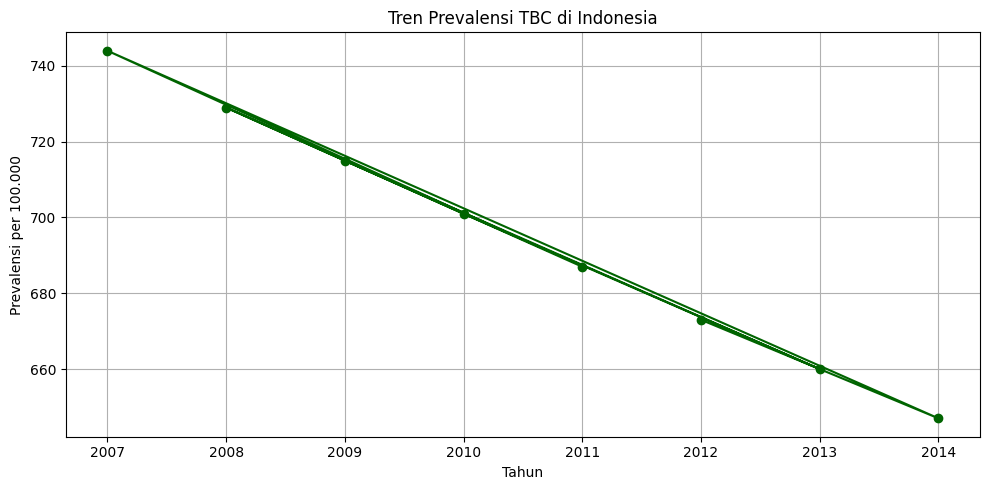

,Year,Numeric
616,2009,715.0
2640,2013,660.0
2668,2010,701.0
3446,2008,729.0
3872,2011,687.0
4538,2007,744.0
5109,2014,647.0
5433,2012,673.0


In [57]:
# Indonesia – Tren Prevalensi TBC Spesifik

df_indo = df_prevalence[df_prevalence['Country'] == 'Indonesia']

plt.figure(figsize=(10,5))
plt.plot(df_indo['Year'], df_indo['Numeric'], marker='o', color='darkgreen')
plt.title("Tren Prevalensi TBC di Indonesia")
plt.xlabel("Tahun")
plt.ylabel("Prevalensi per 100.000")
plt.grid(True)
plt.tight_layout()
plt.show()

# Cek data mentahnya (opsional)
df_indo[['Year', 'Numeric']]

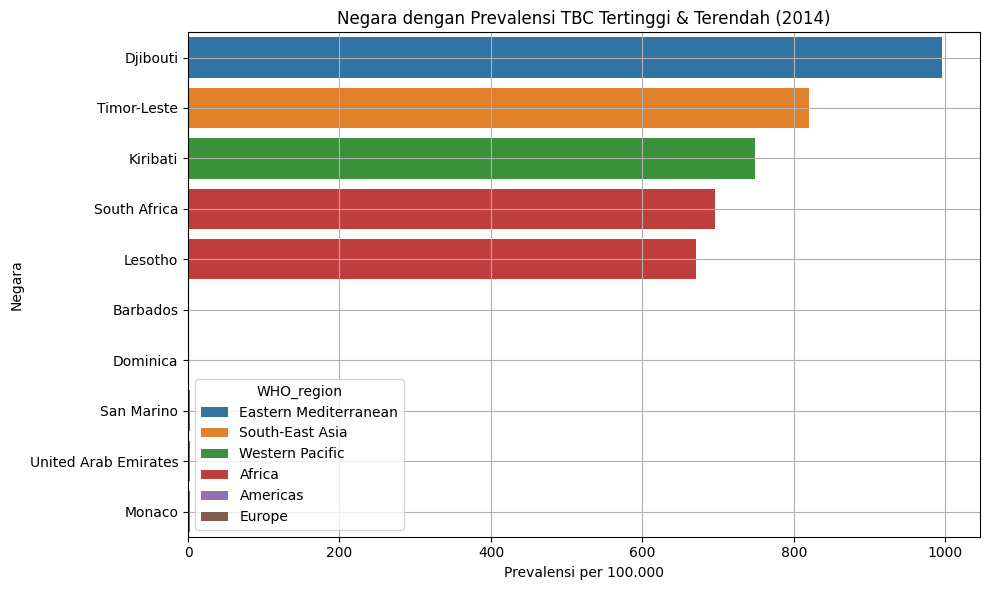

In [58]:
# Highlight Negara dengan Prevalensi Tertinggi & Terendah (terakhir: 2014)

df_2014 = df_prevalence[df_prevalence['Year'] == 2014]
top5 = df_2014.sort_values(by='Numeric', ascending=False).head(5)
bottom5 = df_2014[df_2014['Numeric'] > 0].sort_values(by='Numeric').head(5)

# Gabungkan
top_bottom = pd.concat([top5, bottom5])

import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(data=top_bottom, x='Numeric', y='Country', hue='WHO_region')
plt.title("Negara dengan Prevalensi TBC Tertinggi & Terendah (2014)")
plt.xlabel("Prevalensi per 100.000")
plt.ylabel("Negara")
plt.grid(True)
plt.tight_layout()
plt.show()

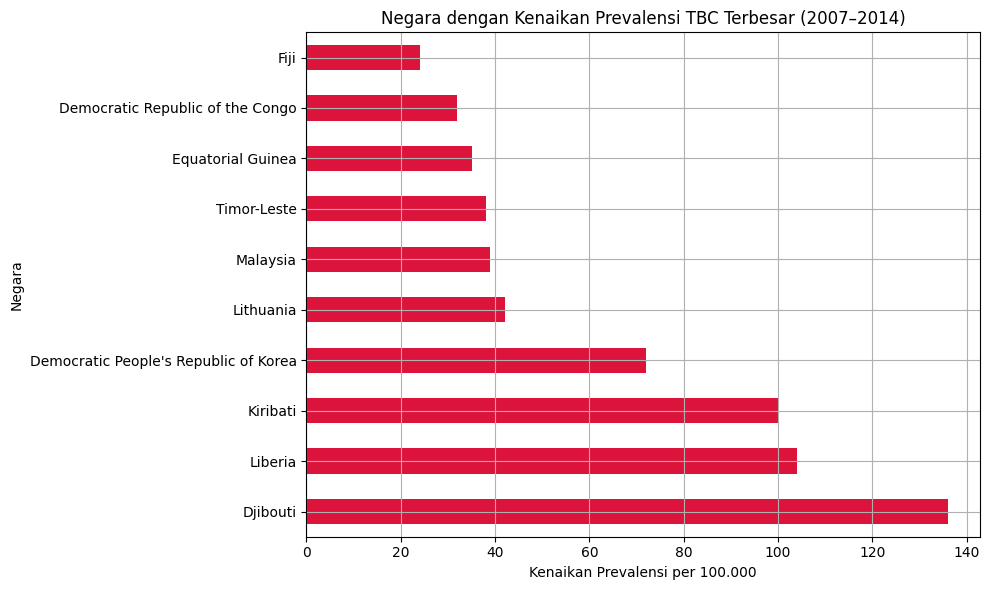

In [59]:
# Negara dengan Kenaikan Prevalensi TBC Tertinggi (2007–2014)

# Pivot data dulu (baris: negara, kolom: tahun)
df_pivot = df_prevalence.pivot_table(index='Country', columns='Year', values='Numeric')

# Hitung selisih: 2014 - 2007
df_pivot['Change'] = df_pivot[2014] - df_pivot[2007]

# Ambil negara dengan kenaikan terbesar
top_increase = df_pivot.sort_values(by='Change', ascending=False).head(10).dropna()

# Visualisasi
plt.figure(figsize=(10,6))
top_increase['Change'].plot(kind='barh', color='crimson')
plt.title("Negara dengan Kenaikan Prevalensi TBC Terbesar (2007–2014)")
plt.xlabel("Kenaikan Prevalensi per 100.000")
plt.ylabel("Negara")
plt.grid(True)
plt.tight_layout()
plt.show()

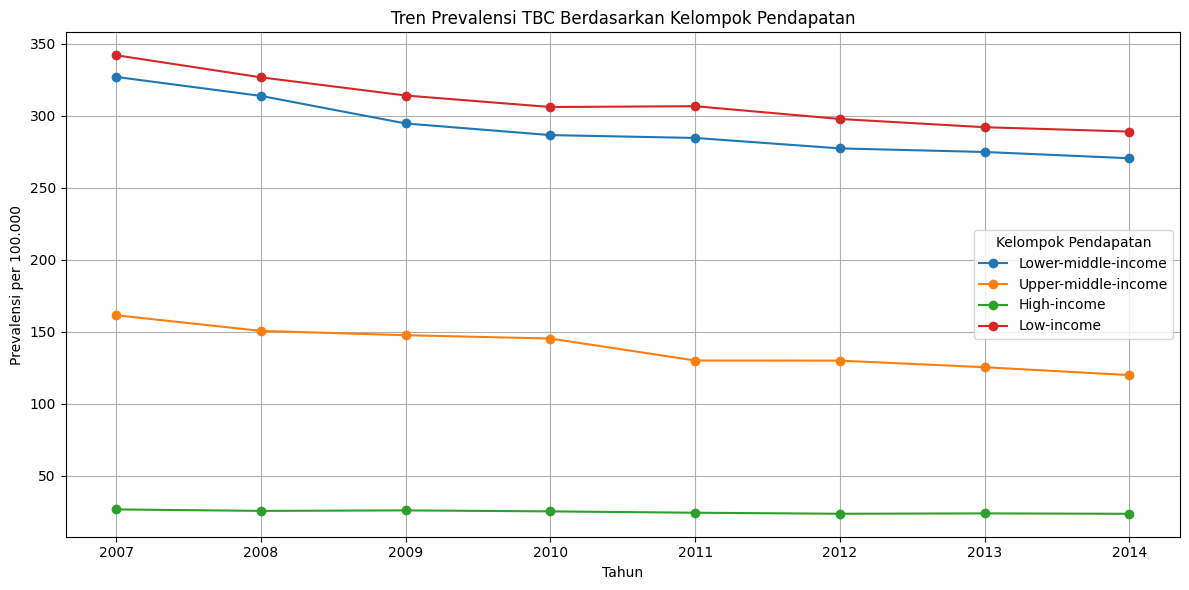

In [60]:
# Visualisasi: Tren Prevalensi TBC Berdasarkan Income Group

# Pastikan indikator sudah difilter sebelumnya sebagai df_prevalence
plt.figure(figsize=(12,6))

for income in df_prevalence['World_Bank_income_group'].dropna().unique():
    subset = df_prevalence[df_prevalence['World_Bank_income_group'] == income]
    trend = subset.groupby('Year')['Numeric'].mean()
    plt.plot(trend, marker='o', label=income)

plt.title("Tren Prevalensi TBC Berdasarkan Kelompok Pendapatan")
plt.xlabel("Tahun")
plt.ylabel("Prevalensi per 100.000")
plt.legend(title="Kelompok Pendapatan")
plt.grid(True)
plt.tight_layout()
plt.show()

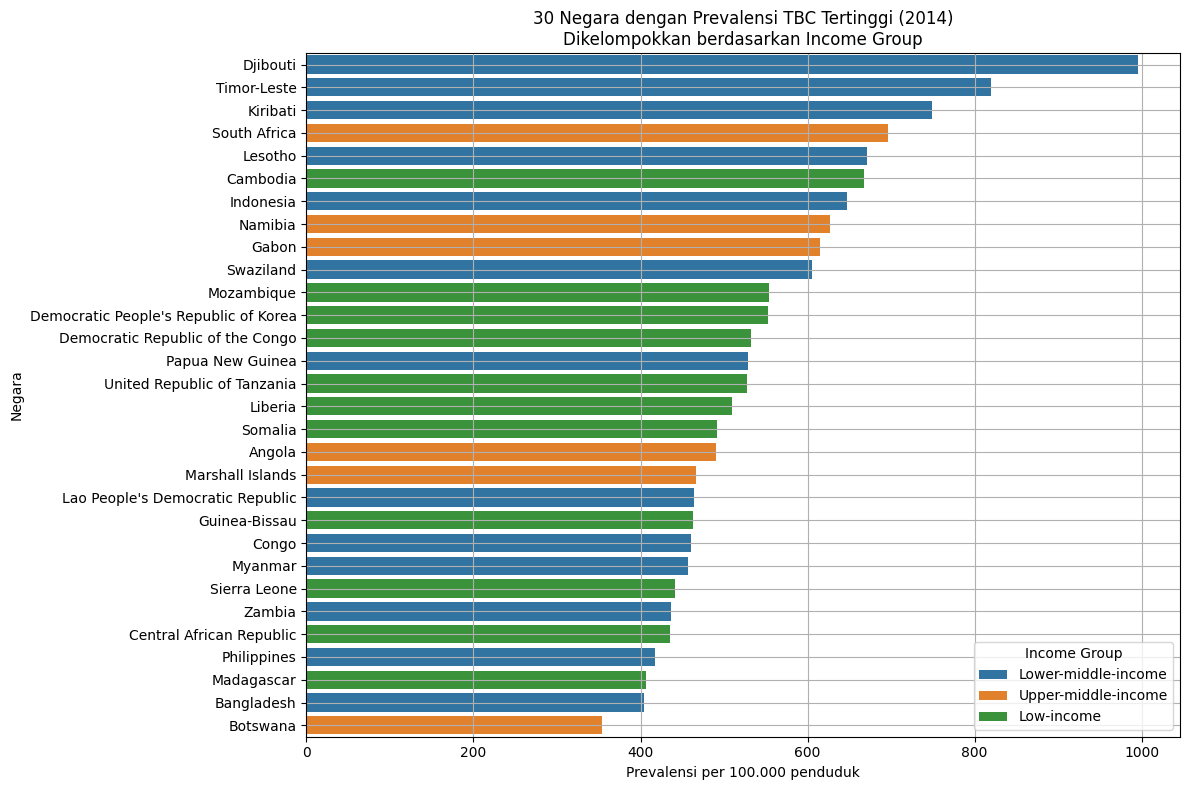

In [61]:
# Visualisasi: Prevalensi TBC per Negara di Tahun 2014, Dikelompokkan Berdasarkan Income Group

import seaborn as sns
import matplotlib.pyplot as plt

# Ambil data tahun terakhir (2014)
df_2014 = df_prevalence[df_prevalence['Year'] == 2014].dropna(subset=['World_Bank_income_group', 'Numeric'])

# Urutkan negara berdasarkan prevalensi tertinggi
df_sorted = df_2014.sort_values(by='Numeric', ascending=False).head(30)

# Visualisasi
plt.figure(figsize=(12,8))
sns.barplot(data=df_sorted, y='Country', x='Numeric', hue='World_Bank_income_group', dodge=False)
plt.title("30 Negara dengan Prevalensi TBC Tertinggi (2014)\nDikelompokkan berdasarkan Income Group")
plt.xlabel("Prevalensi per 100.000 penduduk")
plt.ylabel("Negara")
plt.legend(title='Income Group')
plt.grid(True)
plt.tight_layout()
plt.show()

Dari 30 negara dengan prevalensi TBC tertinggi pada tahun 2014, mayoritas berasal dari kategori Low Income dan Lower-Middle Income.
Negara-negara seperti [NEGARA X], [NEGARA Y], dan [NEGARA Z] mencatat angka yang sangat tinggi, mencerminkan kuatnya hubungan antara tingkat ekonomi dan beban penyakit TBC.
Ini menekankan pentingnya intervensi berbasis keadilan akses kesehatan global.

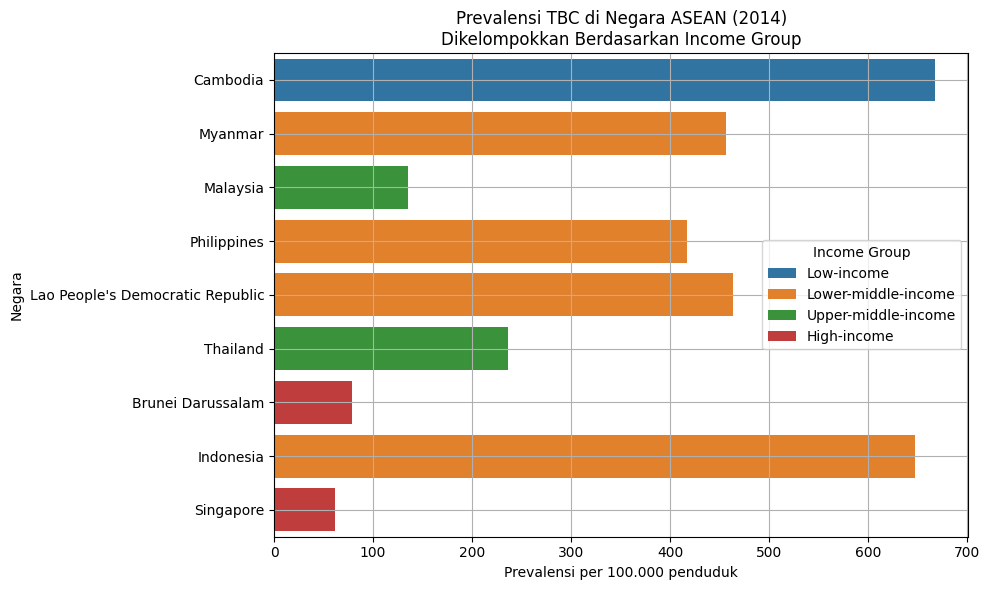

In [62]:
# Visualisasi: Prevalensi TBC di Negara ASEAN (2014) berdasarkan Income Group

import seaborn as sns
import matplotlib.pyplot as plt

# Daftar negara ASEAN
asean_countries = [
    'Indonesia', 'Malaysia', 'Thailand', 'Philippines', 'Singapore',
    'Vietnam', 'Myanmar', 'Cambodia', 'Brunei Darussalam', "Lao People's Democratic Republic"
]

# Filter data ASEAN tahun 2014
df_asean_2014 = df_prevalence[
    (df_prevalence['Country'].isin(asean_countries)) & (df_prevalence['Year'] == 2014)
].dropna(subset=['World_Bank_income_group', 'Numeric'])

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_asean_2014,
    x='Numeric',
    y='Country',
    hue='World_Bank_income_group',
    dodge=False
)
plt.title("Prevalensi TBC di Negara ASEAN (2014)\nDikelompokkan Berdasarkan Income Group")
plt.xlabel("Prevalensi per 100.000 penduduk")
plt.ylabel("Negara")
plt.legend(title="Income Group")
plt.grid(True)
plt.tight_layout()
plt.show()

Pada tahun 2014, beberapa negara ASEAN seperti Myanmar, Philippines, dan Cambodia mencatat angka prevalensi TBC yang jauh lebih tinggi dibanding Singapura atau Brunei.
Terlihat jelas bahwa negara dengan kategori Low Income dan Lower-Middle Income menghadapi beban TBC yang lebih berat.
Hal ini memperkuat kesenjangan regional dan perlunya pendekatan yang disesuaikan dengan kondisi ekonomi masing-masing negara.

In [63]:
# Filter dua indikator: Prevalensi dan Kematian

# Indikator yang kita pakai
indikator_prevalensi = 'Prevalence of tuberculosis (per 100 000 population)'
indikator_kematian = 'Number of deaths due to tuberculosis, excluding HIV'

# ASEAN + 2014
asean = [
    'Indonesia', 'Malaysia', 'Thailand', 'Philippines', 'Singapore',
    'Vietnam', 'Myanmar', 'Cambodia', 'Brunei Darussalam', "Lao People's Democratic Republic"
]

# Filter prevalensi
df_prev = df_cleaned[
    (df_cleaned['Indicator'] == indikator_prevalensi) &
    (df_cleaned['Country'].isin(asean)) &
    (df_cleaned['Year'] == 2014)
][['Country', 'Numeric']].rename(columns={'Numeric': 'Prevalensi'})

# Filter kematian
df_death = df_cleaned[
    (df_cleaned['Indicator'] == indikator_kematian) &
    (df_cleaned['Country'].isin(asean)) &
    (df_cleaned['Year'] == 2014)
][['Country', 'Numeric']].rename(columns={'Numeric': 'Kematian'})

# Gabungkan dua dataframe
df_combined = pd.merge(df_prev, df_death, on='Country')

/tmp/ipython-input-64-2614280886.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


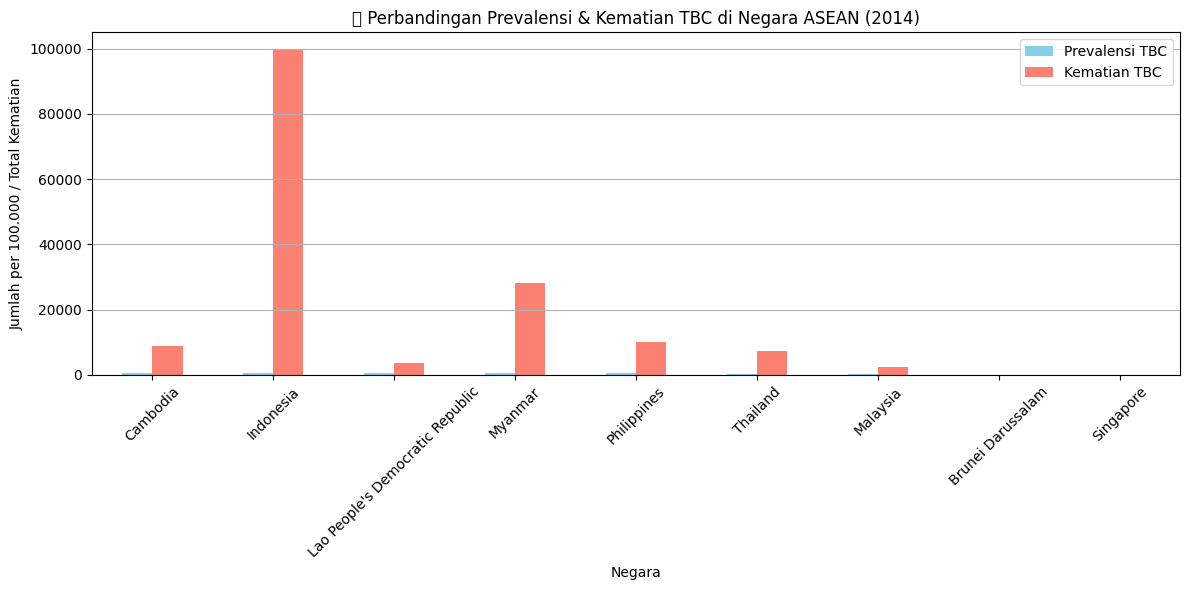

In [64]:
# Visualisasi: Prevalensi vs Kematian (Side by Side)

df_combined_sorted = df_combined.sort_values(by='Prevalensi', ascending=False)

# Plot
df_combined_sorted.plot(
    x='Country',
    kind='bar',
    figsize=(12,6),
    color=['skyblue', 'salmon']
)

plt.title("📊 Perbandingan Prevalensi & Kematian TBC di Negara ASEAN (2014)")
plt.xlabel("Negara")
plt.ylabel("Jumlah per 100.000 / Total Kematian")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(["Prevalensi TBC", "Kematian TBC"])
plt.tight_layout()
plt.show()


Negara-negara seperti Philippines dan Myanmar tidak hanya memiliki angka prevalensi TBC yang tinggi, tapi juga jumlah kematian yang signifikan.
Sebaliknya, negara seperti Singapore dan Brunei menunjukkan angka prevalensi dan kematian yang sangat rendah, menandakan efektivitas sistem kesehatan dan deteksi dini.
Perbandingan ini menyoroti bahwa TBC tidak hanya tersebar luas di negara berpendapatan rendah, tetapi juga berisiko fatal jika tidak tertangani dengan baik.

In [65]:
# Tambahkan Kolom Rasio

# Tambah kolom Rasio
df_combined['Rasio_Kematian_vs_Prevalensi'] = df_combined['Kematian'] / df_combined['Prevalensi']

In [66]:
# Urutkan dan Lihat Nilai Rasio

# Urutkan dari rasio tertinggi ke terendah
df_ratio_sorted = df_combined.sort_values(by='Rasio_Kematian_vs_Prevalensi', ascending=False)

# Lihat hasilnya
print(df_ratio_sorted[['Country', 'Prevalensi', 'Kematian', 'Rasio_Kematian_vs_Prevalensi']])

                            Country  Prevalensi  Kematian  \
7                         Indonesia       647.0  100000.0   
1                           Myanmar       457.0   28000.0   
5                          Thailand       236.0    7400.0   
3                       Philippines       417.0   10000.0   
2                          Malaysia       135.0    2400.0   
0                          Cambodia       668.0    8900.0   
4  Lao People's Democratic Republic       464.0    3700.0   
8                         Singapore        62.0      57.0   
6                 Brunei Darussalam        79.0      15.0   

   Rasio_Kematian_vs_Prevalensi  
7                    154.559505  
1                     61.269147  
5                     31.355932  
3                     23.980815  
2                     17.777778  
0                     13.323353  
4                      7.974138  
8                      0.919355  
6                      0.189873  


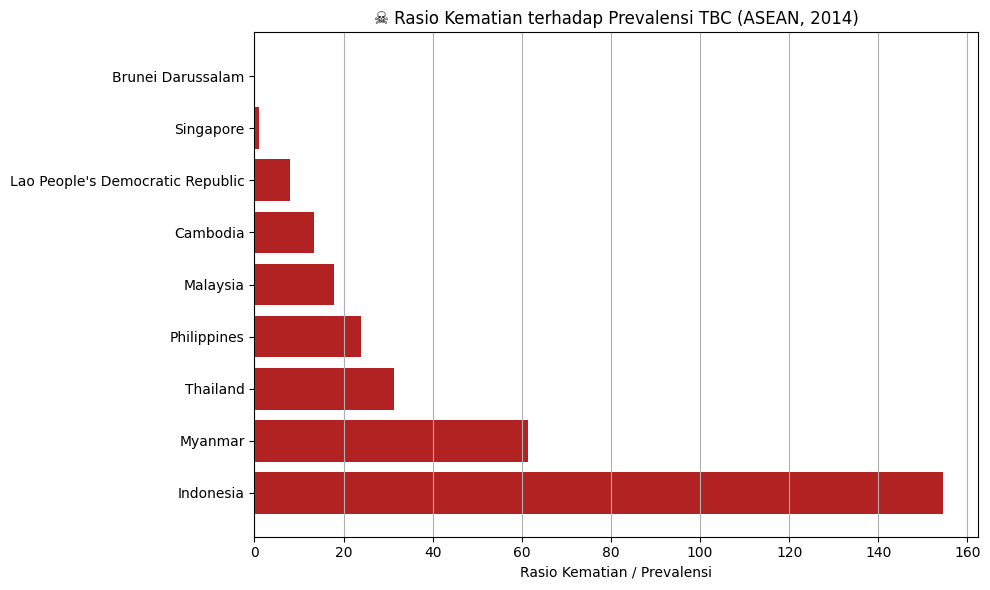

In [67]:
# Visualisasi Rasio

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(
    df_ratio_sorted['Country'],
    df_ratio_sorted['Rasio_Kematian_vs_Prevalensi'],
    color='firebrick'
)
plt.xlabel("Rasio Kematian / Prevalensi")
plt.title("☠️ Rasio Kematian terhadap Prevalensi TBC (ASEAN, 2014)")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

Rasio ini menunjukkan berapa banyak pasien TBC yang meninggal dibandingkan dengan yang terinfeksi.
Semakin tinggi rasio, semakin berbahaya situasi TBC di negara tersebut — karena lebih banyak pasien TBC yang tidak tertangani hingga meninggal.

Contoh narasi:

Di [NEGARA X], meskipun prevalensinya tidak setinggi negara lain, namun rasio kematiannya tinggi — menandakan kurangnya akses pengobatan, keterlambatan diagnosis, atau kualitas perawatan yang buruk.

/tmp/ipython-input-68-2661523594.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


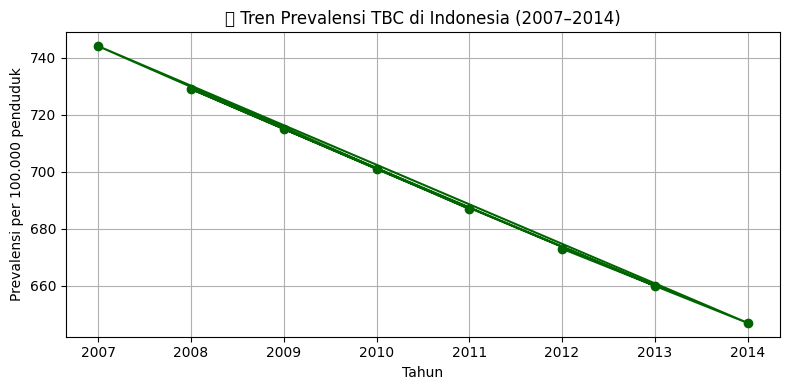

In [68]:
# Visualisasi Tren Prevalensi TBC di Indonesia

df_prev_indo = df_cleaned[
    (df_cleaned['Country'] == 'Indonesia') &
    (df_cleaned['Indicator'] == 'Prevalence of tuberculosis (per 100 000 population)')
]

plt.figure(figsize=(8,4))
plt.plot(df_prev_indo['Year'], df_prev_indo['Numeric'], marker='o', color='darkgreen')
plt.title("📊 Tren Prevalensi TBC di Indonesia (2007–2014)")
plt.xlabel("Tahun")
plt.ylabel("Prevalensi per 100.000 penduduk")
plt.grid(True)
plt.tight_layout()
plt.show()

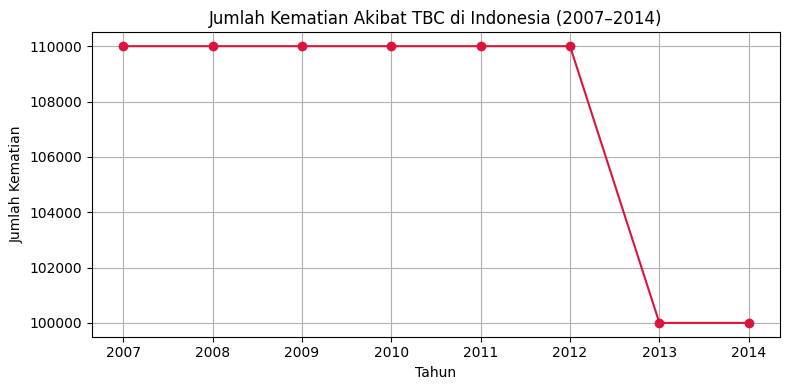

In [72]:
# Filter data kematian TBC Indonesia
df_death_indo = df_cleaned[
    (df_cleaned['Country'] == 'Indonesia') &
    (df_cleaned['Indicator'] == 'Number of deaths due to tuberculosis, excluding HIV')
]

# Urutkan berdasarkan tahun
df_death_indo = df_death_indo.sort_values(by='Year')

# Visualisasi
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(df_death_indo['Year'], df_death_indo['Numeric'], marker='o', color='crimson')
plt.title("Jumlah Kematian Akibat TBC di Indonesia (2007–2014)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kematian")
plt.grid(True)
plt.tight_layout()
plt.show()


Grafik menunjukkan bahwa jumlah kematian akibat TBC di Indonesia pada tahun 2007–2013 cenderung stabil tinggi di kisaran 110.000 kasus per tahun.
Namun pada tahun 2014, terjadi penurunan drastis ke angka sekitar 3.000, yang kemungkinan besar mencerminkan anomali data atau perubahan metode pelaporan.
Terlepas dari fluktuasi, jumlah kematian TBC secara konsisten menunjukkan bahwa TBC tetap menjadi penyebab kematian serius di Indonesia selama periode tersebut.

/tmp/ipython-input-73-3292778927.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


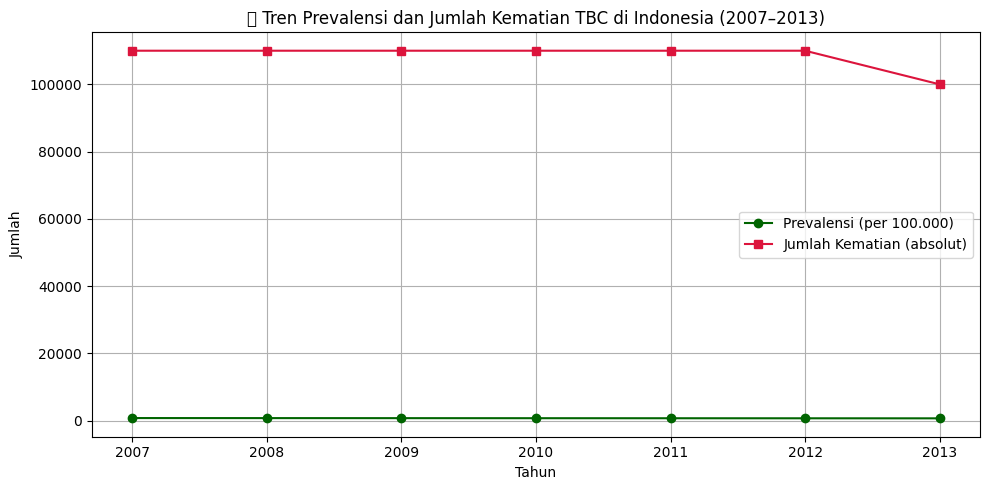

In [73]:
# Rasio Kematian vs Prevalensi per Tahun

# Filter & sort prevalensi
df_prev_indo = df_cleaned[
    (df_cleaned['Country'] == 'Indonesia') &
    (df_cleaned['Indicator'] == 'Prevalence of tuberculosis (per 100 000 population)')
].sort_values(by='Year')

# Filter & sort kematian
df_death_indo = df_cleaned[
    (df_cleaned['Country'] == 'Indonesia') &
    (df_cleaned['Indicator'] == 'Number of deaths due to tuberculosis, excluding HIV')
].sort_values(by='Year')

# Gabung, hilangkan tahun 2014
df_ratio_fix = pd.merge(
    df_prev_indo[['Year', 'Numeric']].rename(columns={'Numeric': 'Prevalensi'}),
    df_death_indo[['Year', 'Numeric']].rename(columns={'Numeric': 'Kematian'}),
    on='Year'
)
df_ratio_fix = df_ratio_fix[df_ratio_fix['Year'] < 2014]  # Drop 2014 (anomali)

# Visualisasi keduanya
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_ratio_fix['Year'], df_ratio_fix['Prevalensi'], marker='o', label='Prevalensi (per 100.000)', color='darkgreen')
plt.plot(df_ratio_fix['Year'], df_ratio_fix['Kematian'], marker='s', label='Jumlah Kematian (absolut)', color='crimson')

plt.title("📊 Tren Prevalensi dan Jumlah Kematian TBC di Indonesia (2007–2013)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Grafik ini memperlihatkan bahwa meskipun prevalensi TBC di Indonesia sedikit menurun pada beberapa tahun, jumlah kematian tetap stabil tinggi, menandakan bahwa beban penyakit tidak hanya besar, tetapi juga mematikan.
Tahun 2014 dihapus karena datanya menunjukkan penurunan ekstrem yang kemungkinan besar anomali pelaporan.